In [2]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from statsmodels.tsa import stattools

# load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = sio.loadmat('/content/drive/MyDrive/MLinFinance/Project/MSFT_20141103.mat')

In [5]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3  #time in seconds, measured from NASDAQ opening at 9:30am
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
nMO = np.array(LOB['NumberMO'][0][0]*1.0)                       #total number of MOs submitted in the given 0.1 second interval
vMO = np.array(LOB['VolumeMO'][0][0]*1.0)                       #total volume of MOs submitted in the given 0.1 second interval
MO=np.array(LOB['MO'][0][0]*1.0)                                #information about market orders
dt = t[1]-t[0]
print(dt)
print(t[0])
print(t[-1])

0.1
0.1
23400.0


In [6]:
print(bid)
print()
print(bidvol)

[[46.73 46.71 46.64 ... 45.5  45.48 45.2 ]
 [46.75 46.74 46.73 ... 46.25 46.2  46.  ]
 [46.8  46.74 46.73 ... 46.3  46.28 46.25]
 ...
 [47.43 47.42 47.41 ... 47.25 47.24 47.22]
 [47.43 47.42 47.41 ... 47.25 47.24 47.22]
 [47.43 47.42 47.41 ... 47.25 47.24 47.22]]

[[  100.  2386.  3100. ...    75.   100.   100.]
 [  100.   228.   395. ...  3000.   100.   100.]
 [  986.   228.   495. ...  2000.  2000.  3000.]
 ...
 [  407. 23200. 36300. ...  1165.  2200.    60.]
 [  407. 22000. 36300. ...  1165.  2200.    60.]
 [  407. 22000. 37700. ...  1165.  2200.    60.]]


# LOB

2340.1
Price levels
[47.14 47.13 47.12 47.11 47.1  47.09 47.08 47.07 47.06 47.05 47.04 47.02
 47.01 47.   46.97 46.96 46.95 46.93 46.92 46.91]
[47.15 47.16 47.17 47.18 47.19 47.2  47.21 47.22 47.23 47.24 47.25 47.26
 47.27 47.28 47.29 47.3  47.31 47.33 47.34 47.35]
LO volumes
[1300. 2947. 2661. 4297. 3403. 4129. 2971. 2506. 1206. 2500.  100. 1200.
   50.  800.  253.  100. 2550. 4833. 1800.  150.]
[1600. 5571. 2398. 2770. 2606. 2200. 1600. 6800.  400. 1000.  330. 6607.
  800. 1100.  920. 2164.  200. 1880.  260. 2785.]


Text(0.5, 1.0, 'LOB from 10 am to closing')

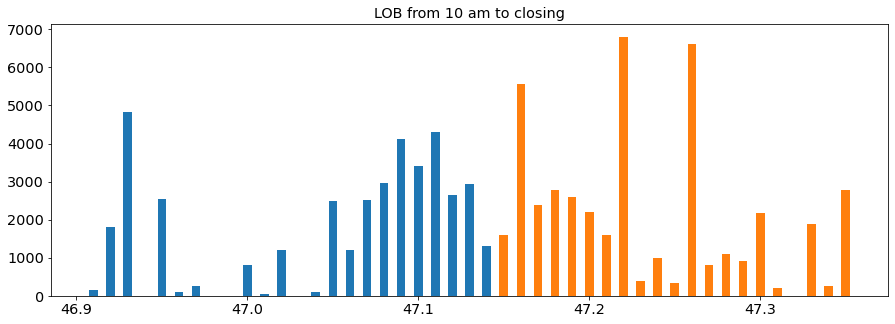

In [7]:
#print and plot the LOB at time t[tcur]
tcur = 10*60*39
print(t[tcur])
print('Price levels')
print(bid[tcur,:])
print(ask[tcur,:])
print('LO volumes')
print(bidvol[tcur,:])
print(askvol[tcur,:])
plt.bar(bid[tcur,:],bidvol[tcur,:],width=0.005)
plt.bar(ask[tcur,:],askvol[tcur,:],width=0.005)
plt.show
plt.title('LOB from 10 am to closing')

[1. 0.]
[300.   0.]
LO volumes
[1300. 2947. 2661. 4297. 3403. 4129. 2971. 2506. 1206. 2600.  100. 1200.
   50.  800.  253.  100. 2550. 4833. 1800.  150.]
[1500. 5971. 2398. 2770. 3206. 2200. 1600. 6800.  400. 1000.  330. 6607.
  800. 1100.  920. 2164.  200. 1880.  260. 2785.]


<function matplotlib.pyplot.show(*args, **kw)>

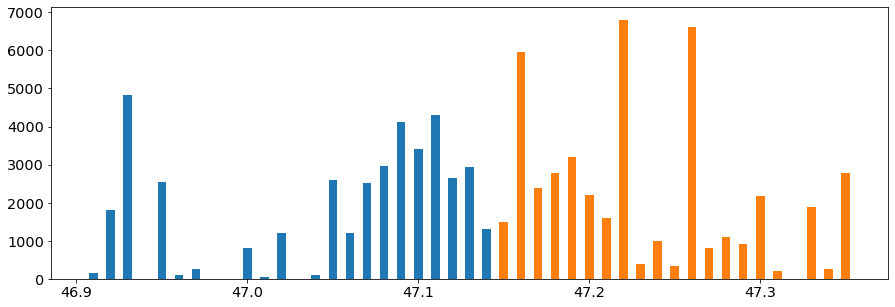

In [8]:
#print and plot the LOB at time t[tcur+1], and the MOs
#that occured in the following 0.1 seconds
print(nMO[tcur])
print(vMO[tcur])
#print(nMO[tcur+1])
#print(vMO[tcur+1])
print('LO volumes')
print(bidvol[tcur+1,:])
print(askvol[tcur+1,:])
plt.bar(bid[tcur+1,:],bidvol[tcur+1,:],width=0.005)
plt.bar(ask[tcur+1,:],askvol[tcur+1,:],width=0.005)
plt.show

# Bid/ask prices, midprice, spread

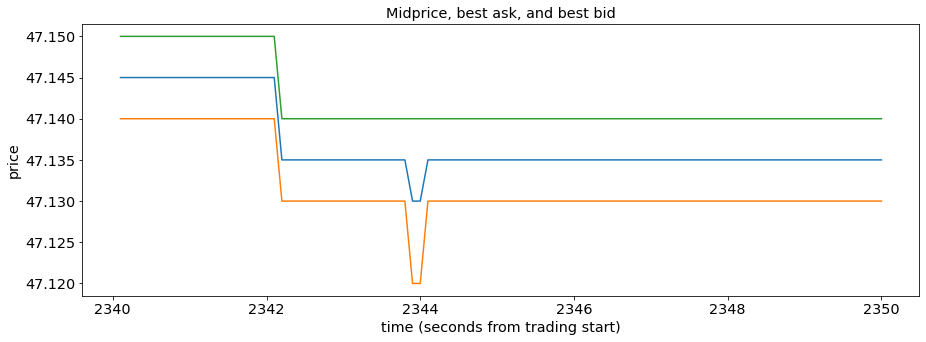

In [9]:
#plot the (best) bid/ask prices and midprice
midprice = 0.5*(bid[:,0]+ask[:,0])
spread = ask[:,0]-bid[:,0]
plt.plot(t[tcur:(tcur+100)],midprice[tcur:(tcur+100)])
plt.plot(t[tcur:(tcur+100)],bid[tcur:(tcur+100),0])
plt.plot(t[tcur:(tcur+100)],ask[tcur:(tcur+100),0])
plt.title('Midprice, best ask, and best bid')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

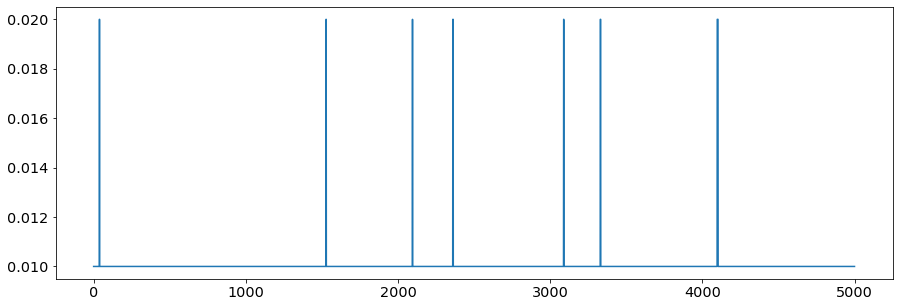

In [10]:
#plot the spread values over time
plt.plot(spread[tcur:(tcur+5000)])

# Market orders (MOs)

In [11]:
#print the total volumes of MOs submitted in each 0.1-second interval
print(vMO[tcur:(tcur+25)])
#print the total volume of LOs on each side of the book at the beginning of each 0.1-second interval
print([np.sum(bidvol[i,:]) for i in range(tcur,tcur+25)])
print([np.sum(askvol[i,:]) for i in range(tcur,tcur+25)])

[[300.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0. 206.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]]
[39756.0, 39856.0, 39856.0, 39556.0, 39026.0, 39026.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38226.0, 38026.0, 38026.0, 38426.0]
[43991.0, 44891.0, 44691.0, 44591.0, 44379.0, 44379.0, 44379.0, 44179.0, 44179.0, 43979.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 43979.0, 43095.0, 43095.0, 42795.0, 42695.0]


(array([2.2977e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6760e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 7.8600e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0300e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.7600e+02, 0.0000e+00, 0.0000e+00, 9.7000e+01]),
 array([-0.1  ,  0.155,  0.41 ,  0.665,  0.92 ,  1.175,  1.43 ,  1.685,
         1.94 ,  2.195,  2.45 ,  2.705,  2.96 ,  3.215,  3.47 ,  3.725,
         3.98 ,  4.235,  4.49 ,  4.745,  5.   ]),
 <a list of 20 Patch objects>)

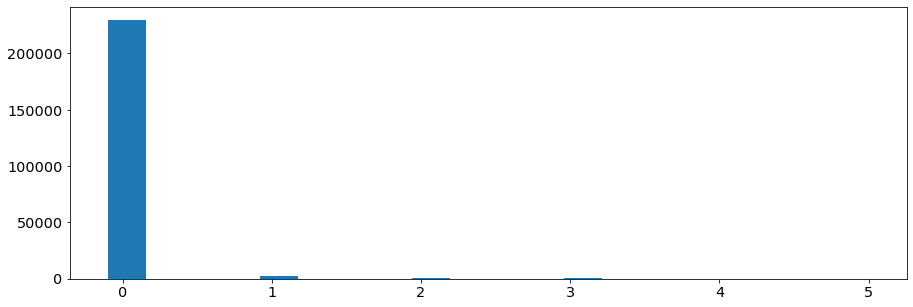

In [12]:
#distribution of the number of MOs submitted in a single 0.1-second interval
plt.hist(nMO[:,0]+nMO[:,1],20,(-0.1,5))

In [13]:
#print the detailed MO data contained in the object 'MO'
print(len(MO))
#print((MO[0,0]-3600000*9.5)*1e-3)      #time from exchange opening, in seconds
print((MO[100:110,0]-3600000*9.5)*1e-3) #time from exchange opening, in seconds
print(MO[100:110,1]*1e-4)               #best bid price
print(MO[100:110,2]*1e-4)               #best ask price
print(MO[100:110,6])                    #volume of MO
print(MO[100:110,7])                    #type of MO (-1=buy +1=sell)
print(MO[100:110,3])                    #volume at best bid price
print(MO[100:110,4])                    #volume at best ask price

7981
[2.926 3.883 3.933 4.096 4.204 4.601 4.702 4.704 4.904 5.078]
[46.76 46.76 46.76 46.76 46.76 46.76 46.76 46.76 46.76 46.76]
[46.79 46.78 46.78 46.78 46.79 46.79 46.79 46.79 46.78 46.78]
[ 475. 1100. 2000.  300.  100.  300.  600.  400.  200.  200.]
[-1. -1.  1. -1.  1.  1.  1.  1.  1. -1.]
[10400. 10000. 10200.  8200.  8400.  7900.  7600.  7000.  6600.  6400.]
[ 949. 1100.  300.  300.  100. 1500. 1500. 1500.  200.  200.]


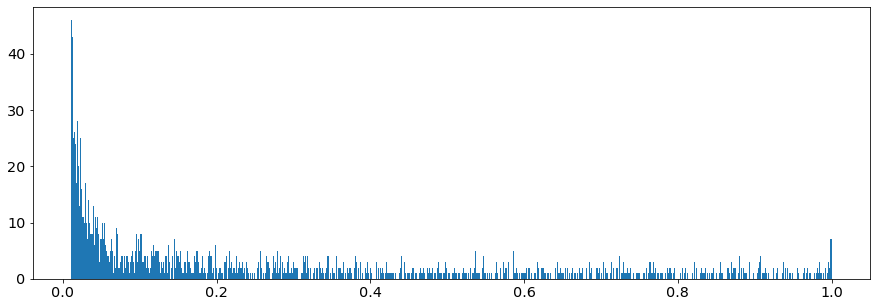

In [14]:
#distribution of the time between consecutive MOs
plt.hist(np.diff(MO[:,0]*1e-3),1000,(0.01,1.0));